In [11]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
wines = pd.read_csv("Data\wines.csv")
wines.drop(columns=["Unnamed: 0"],inplace=True)
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,6.0,0.200,0.32,3.0,0.031,26.0,118.0,0.99134,3.38,0.68,11.2,7,white,medium
1,9.2,0.430,0.49,2.4,0.086,23.0,116.0,0.99760,3.23,0.64,9.5,5,red,low
2,6.3,0.270,0.18,7.7,0.048,45.0,186.0,0.99620,3.23,0.47,9.0,5,white,low
3,8.6,0.485,0.29,4.1,0.026,19.0,101.0,0.99180,3.01,0.38,12.4,5,white,low
4,7.7,0.270,0.34,1.8,0.028,26.0,168.0,0.99110,2.99,0.48,12.1,7,white,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,8.3,0.280,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7,red,medium
6493,8.6,0.360,0.26,11.1,0.030,43.5,171.0,0.99480,3.03,0.49,12.0,5,white,low
6494,6.8,0.660,0.07,1.6,0.070,16.0,61.0,0.99572,3.29,0.60,9.3,5,red,low
6495,7.7,0.320,0.62,10.6,0.036,56.0,153.0,0.99780,3.13,0.44,8.9,6,white,medium


In [4]:
X = wines.drop(columns=["quality_label", "quality", "wine_type"])
y = wines["quality_label"]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
# train the model
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [7]:
## predict and evaluate performance
clf.predict(X_test)

array(['medium', 'low', 'medium', ..., 'medium', 'medium', 'low'],
      dtype=object)

In [8]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

        high       1.00      0.47      0.64        34
         low       0.76      0.72      0.74       453
      medium       0.83      0.87      0.85       813

    accuracy                           0.81      1300
   macro avg       0.86      0.69      0.74      1300
weighted avg       0.81      0.81      0.81      1300



In [9]:
# the model will result as overfitting cause I din't define any depth for it therefore it will try to decompose teh database until it can get almost extact result. The model loose it validity.
clf.score(X_train, y_train)

1.0

In [12]:
clf_scores = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
clf_scores

array([0.81076923, 0.81230769, 0.84615385, 0.83846154, 0.80307692,
       0.82      , 0.84307692, 0.80893683, 0.81664099, 0.82280431])

In [13]:
# working on model depth
dep_range = range(2,20)
train_scores=[]
test_scores=[]
for i in dep_range:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(X_train,y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

In [14]:
print(train_scores)
print(test_scores)

[0.699634404464114, 0.7171445064460266, 0.7329228401000577, 0.7490860111602847, 0.7687127188762748, 0.7935347315759091, 0.8227823744467962, 0.8572253223013276, 0.88878198960939, 0.9153357706369059, 0.9401577833365403, 0.9613238406773138, 0.9761400808158553, 0.9842216663459689, 0.9917259957667885, 0.9959592072349432, 0.9980758129690206, 0.9992303251876082]
[0.7046153846153846, 0.7153846153846154, 0.72, 0.7307692307692307, 0.7407692307692307, 0.7492307692307693, 0.77, 0.7830769230769231, 0.7846153846153846, 0.7861538461538462, 0.7953846153846154, 0.806923076923077, 0.8092307692307692, 0.81, 0.8038461538461539, 0.8038461538461539, 0.8046153846153846, 0.81]


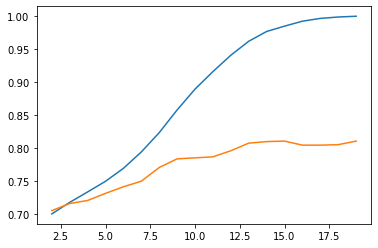

In [15]:
sns.lineplot(x= dep_range, y= train_scores);
sns.lineplot(x=dep_range, y= test_scores);

In [16]:
# Looking at the graph I realize that once passed depth=5 the model will be overfitting
# setting 5 as chosen depth
clf = RandomForestClassifier(random_state=0, max_depth=5)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [17]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        34
         low       0.70      0.54      0.61       453
      medium       0.74      0.87      0.80       813

    accuracy                           0.73      1300
   macro avg       0.48      0.47      0.47      1300
weighted avg       0.71      0.73      0.71      1300



In [18]:
clf.score(X_train, y_train)

0.7471618241293053

In [82]:
# changing parameters
# max_features - jow many features taken into account by any tree

clf = RandomForestClassifier(random_state=5, max_depth=5, class_weight= "balanced",max_features=5)
clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=5,
                       random_state=5)

In [83]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

        high       0.15      0.57      0.24        46
         low       0.61      0.74      0.67       462
      medium       0.77      0.55      0.64       792

    accuracy                           0.62      1300
   macro avg       0.51      0.62      0.52      1300
weighted avg       0.69      0.62      0.64      1300



In [84]:
clf.score(X_train, y_train)

0.6551856840484895